## Axes(& Figure)

1. Plotting many graphs on one common axe(Overlaying plots)
2. Creating axes within a figure
3. Creating **subplots** within a figure
4. Controlling **axes**

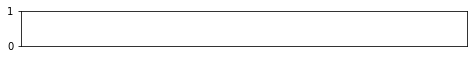

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


plt.figure(figsize=(8, 6))
n = 8

# Null Locator
ax = plt.subplot(n, 1, 1)
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
plt.show()

In [ ]:

ax.text(0.0, 0.1, "NullLocator()", fontsize=14, transform=ax.transAxes)

# Multiple Locator
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.text(0.0, 0.1, "MultipleLocator(0.5)", fontsize=14,
        transform=ax.transAxes)

# Fixed Locator
ax = plt.subplot(n, 1, 3)
setup(ax)
majors = [0, 1, 5]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.linspace(0, 1, 11)[1:-1]
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.text(0.0, 0.1, "FixedLocator([0, 1, 5])", fontsize=14,
        transform=ax.transAxes)

# Linear Locator
ax = plt.subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.LinearLocator(3))
ax.xaxis.set_minor_locator(ticker.LinearLocator(31))
ax.text(0.0, 0.1, "LinearLocator(numticks=3)",
        fontsize=14, transform=ax.transAxes)

# Index Locator
ax = plt.subplot(n, 1, 5)
setup(ax)
ax.plot(range(0, 5), [0]*5, color='White')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=.5, offset=.25))
ax.text(0.0, 0.1, "IndexLocator(base=0.5, offset=0.25)",
        fontsize=14, transform=ax.transAxes)

# Auto Locator
ax = plt.subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.text(0.0, 0.1, "AutoLocator()", fontsize=14, transform=ax.transAxes)

# MaxN Locator
ax = plt.subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(40))
ax.text(0.0, 0.1, "MaxNLocator(n=4)", fontsize=14, transform=ax.transAxes)

# Log Locator
ax = plt.subplot(n, 1, 8)
setup(ax)
ax.set_xlim(10**3, 10**10)
ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",
        fontsize=15, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)

In [ ]:
plt.show()
df = pd.read_csv('../data/employment.csv', parse_dates=['datestamp'], index_col='datestamp')

/home/sergio212/.pyenv/versions/3.6.6/envs/jupyterLab/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


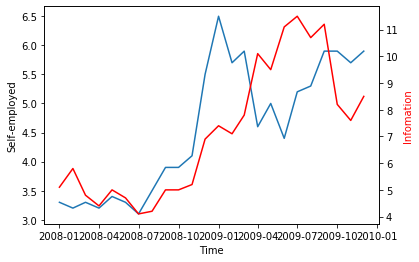

In [7]:
# plot the time series data
fig, ax = plt.subplots()
years = df["2008-01-01":"2009-12-31"]
ax.plot(years.index, years['Self-employed'])
ax.set_xlabel('Time')
ax.set_ylabel('Self-employed')
# using twin axes to dsiplay 2 variables with shared x axis and separate y axes
ax2 = ax.twinx()
ax2.plot(years.index, years['Information'], color='red')
ax2.set_ylabel('Infomation', color='red')
plt.show()

**`axes()` Command**  
Syntax: axes(\[x_lo, y_lo, width, height\])
* Units between o and 1(figure dimensions)  

* 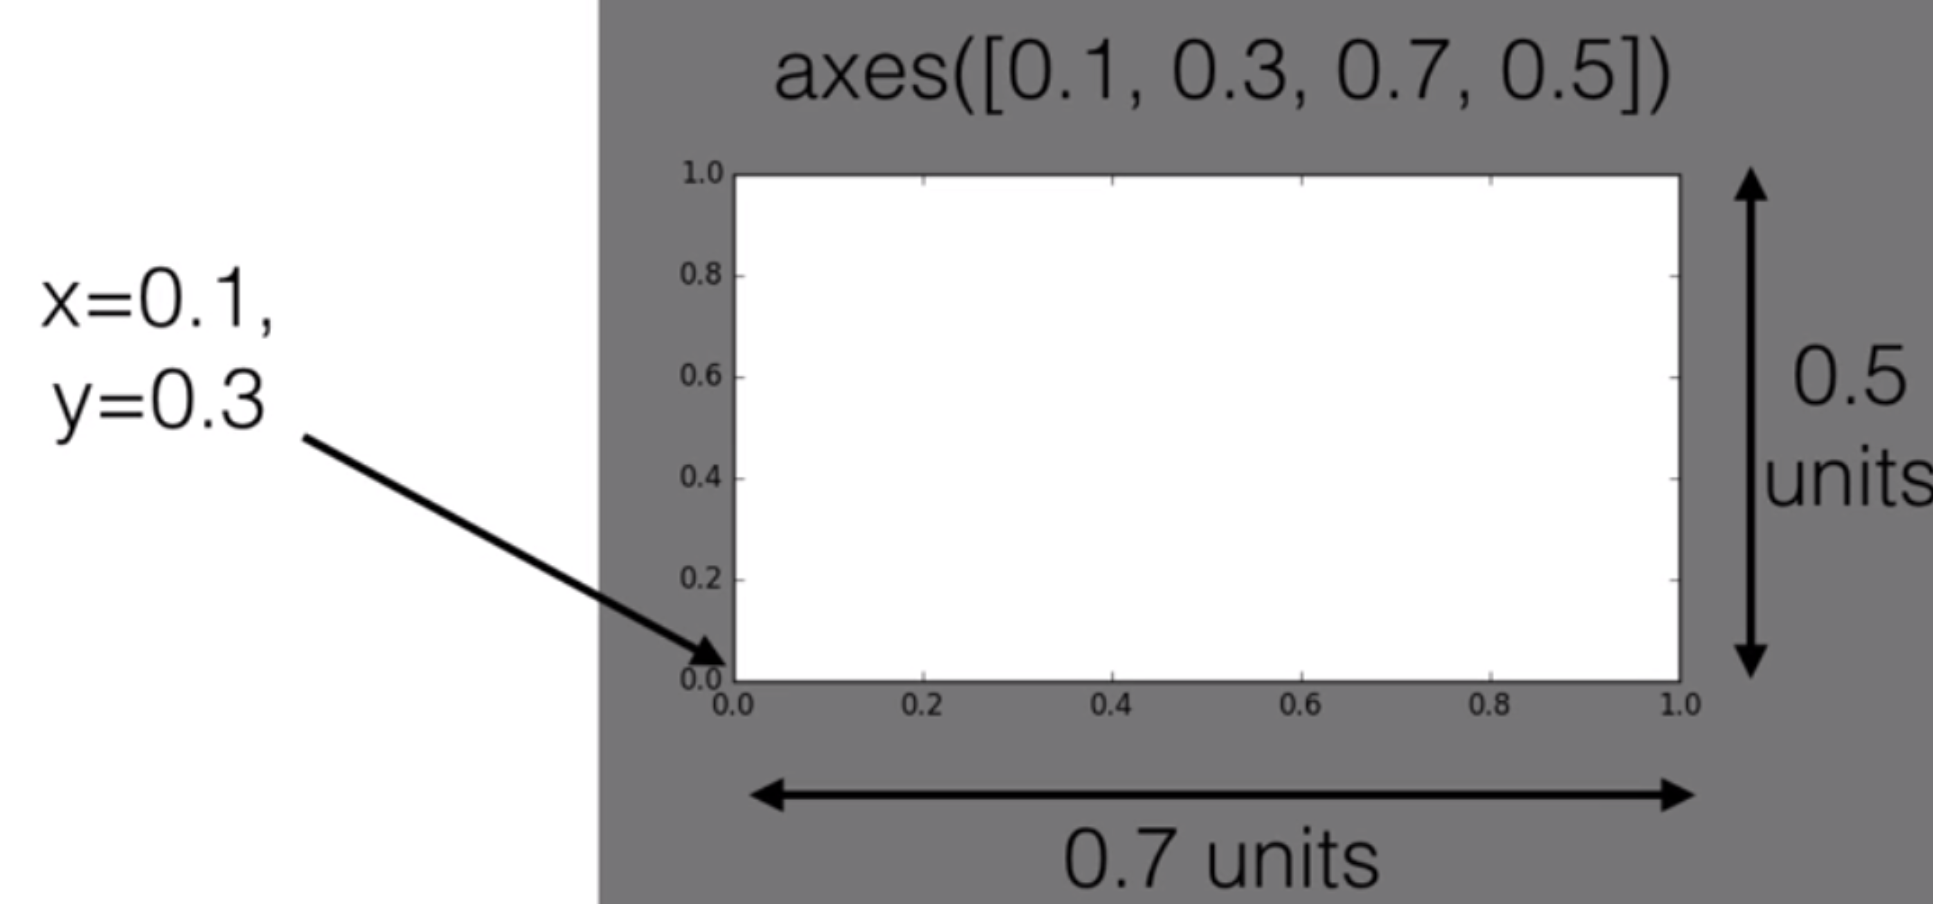

In [ ]:
# since overlaying curves is not useful when scales differ widely
# use axes() to construct axes explicitly which create coordinate axes within a figure within which subsequent plots are drawn
plt.axes([0.05, 0.05, 0.425, 0.9])
plt.plot(t, temperature, 'r')
plt.xlabel('Date')
plt.title('Temperature')
plt.axes([0.05, 0.05, 0.425, 0.9])   # make new axes on the right of the figure also makes those axes active which means next 3 cammands place objects in the second axes
plt.plot(t, dwepoing, 'b')
plt.xlabel('Date')
plt.title('Dew Point')
plt.show() # Renders plot objects to screen

**`subplot` command**

* Syntax: subplot(nrows, ncols, nsubplot)
* Subplot ordering:
    + Row-wise from top left
    + Indexed from 1 

In [ ]:
# The arguments to 'plot()' can be Numpy arrays, lists, or Pandas Series
plt.plot(t, temperature, 'r')
plt.plot(t, dwepoing, 'b')  # appears on the same axes
plt.xlabel('Date')
plt.title('')
plt.show() # Renders plot objects to screen


plt.subplot(2, 1, 1)
plt.plot(t, temperature, 'r')
plt.xlabel('Date')
plt.title('Temperature')
plt.subplot(2, 1, 2)
plt.plot(t, dewpoint, 'b')
plt.xlabel('Date')
plt.title('Dew Point')
# plt.tight_layout()
plt.show()

**`axis` Command**:Customizing axes  
axis([xmin, xmax, ymin, ymax])  
xlim([xmin, ymax])  
ylim([ymin, ymax])
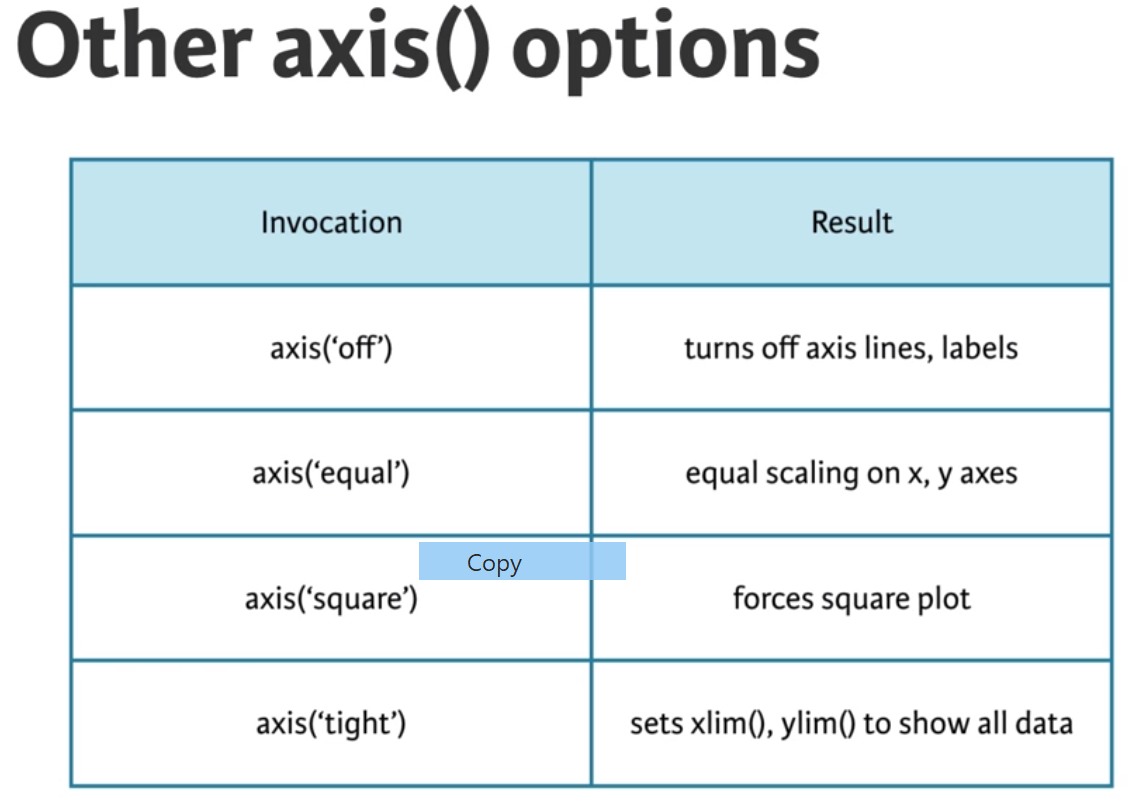

## Legend and Annotations

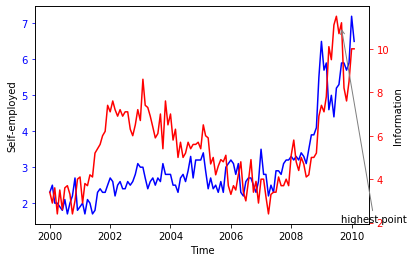

In [40]:
# sumup: make a function
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.tick_params('y', colors=color)

fig, ax = plt.subplots()

plot_timeseries(ax, df.index, df['Self-employed'], 'blue', 'Time', 'Self-employed')
ax2 = ax.twinx()
plot_timeseries(ax2, df.index, df['Information'], 'red', 'Time', 'Information')
# annotation
ax2.annotate('highest point', 
             xy=(pd.Timestamp('2009-08-29'), 11),
             xytext=(pd.Timestamp('2009-08-29'), 2),
             arrowprops={'arrowstyle':"->", "color":'gray'})
plt.show()

## Plotting 2D arrays
* or raster data
* represent either images or functions of 2 variables(i.e. bivariate function)

**Numpy Array**
* Homogeneous in type
* vectorized comutations(i.e. Calculation all at once)